In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

ModuleNotFoundError: No module named 'pandas'

In [238]:
final_df= pd.read_csv('./Corrected Data/baseline.csv')
cycle_1 = pd.read_csv('./Corrected Data/cycle_1.csv')
cycle_2 = pd.read_csv('./Corrected Data/cycle_2.csv')
cycle_3 = pd.read_csv('./Corrected Data/cycle_3.csv')
cycle_4 = pd.read_csv('./Corrected Data/cycle_4.csv')
cycle_5 = pd.read_csv('./Corrected Data/cycle_5.csv')
cycle_6 = pd.read_csv('./Corrected Data/cycle_6.csv')
cycle_7 = pd.read_csv('./Corrected Data/cycle_7.csv')
cycle_8 = pd.read_csv('./Corrected Data/cycle_8.csv')
cycle_9 = pd.read_csv('./Corrected Data/cycle_9.csv')
cycle_10 = pd.read_csv('./Corrected Data/cycle_10.csv')

In [234]:
check = pd.read_csv('./Corrected Data/check.csv')

In [240]:
final_df['Timestamp'] = pd.to_datetime(final_df['Timestamp'])
final_df['period'] = (final_df['Timestamp'] - final_df['Timestamp'].iloc[0]).dt.total_seconds()
cycle_1['Timestamp'] = pd.to_datetime(cycle_1['Timestamp'])
cycle_1['period'] = (cycle_1['Timestamp'] - cycle_1['Timestamp'].iloc[0]).dt.total_seconds()
cycle_2['Timestamp'] = pd.to_datetime(cycle_2['Timestamp'])
cycle_2['period'] = (cycle_2['Timestamp'] - cycle_2['Timestamp'].iloc[0]).dt.total_seconds()
cycle_3['Timestamp'] = pd.to_datetime(cycle_3['Timestamp'])
cycle_3['period'] = (cycle_3['Timestamp'] - cycle_3['Timestamp'].iloc[0]).dt.total_seconds()
cycle_4['Timestamp'] = pd.to_datetime(cycle_4['Timestamp'])
cycle_4['period'] = (cycle_4['Timestamp'] - cycle_4['Timestamp'].iloc[0]).dt.total_seconds()
cycle_5['Timestamp'] = pd.to_datetime(cycle_5['Timestamp'])
cycle_5['period'] = (cycle_5['Timestamp'] - cycle_5['Timestamp'].iloc[0]).dt.total_seconds()
cycle_6['Timestamp'] = pd.to_datetime(cycle_6['Timestamp'])
cycle_6['period'] = (cycle_6['Timestamp'] - cycle_6['Timestamp'].iloc[0]).dt.total_seconds()
cycle_7['Timestamp'] = pd.to_datetime(cycle_7['Timestamp'])
cycle_7['period'] = (cycle_7['Timestamp'] - cycle_7['Timestamp'].iloc[0]).dt.total_seconds()
cycle_8['Timestamp'] = pd.to_datetime(cycle_8['Timestamp'])
cycle_8['period'] = (cycle_8['Timestamp'] - cycle_8['Timestamp'].iloc[0]).dt.total_seconds()
cycle_9['Timestamp'] = pd.to_datetime(cycle_9['Timestamp'])
cycle_9['period'] = (cycle_9['Timestamp'] - cycle_9['Timestamp'].iloc[0]).dt.total_seconds()
cycle_10['Timestamp'] = pd.to_datetime(cycle_10['Timestamp'])
cycle_10['period'] = (cycle_10['Timestamp'] - cycle_10['Timestamp'].iloc[0]).dt.total_seconds()

In [241]:
minx, maxx

(np.float64(596.2231591332484), np.float64(1183.406520292748))

In [242]:
minx = max(final_df['Ch3 TC Temp (Chart) (°C)'].min(),
           cycle_1['Ch3 TC Temp (Chart) (°C)'].min(),
           cycle_2['Ch3 TC Temp (Chart) (°C)'].min(),
           cycle_3['Ch3 TC Temp (Chart) (°C)'].min(),
           cycle_4['Ch3 TC Temp (Chart) (°C)'].min(),
           cycle_5['Ch3 TC Temp (Chart) (°C)'].min(),
           cycle_6['Ch3 TC Temp (Chart) (°C)'].min(),
           cycle_7['Ch3 TC Temp (Chart) (°C)'].min(),
           cycle_8['Ch3 TC Temp (Chart) (°C)'].min(),
           cycle_9['Ch3 TC Temp (Chart) (°C)'].min(),
           cycle_10['Ch3 TC Temp (Chart) (°C)'].min())
maxx = final_df['Ch3 TC Temp (Chart) (°C)'].max()
baseline = final_df[(final_df['Ch3 TC Temp (Chart) (°C)'] >= minx) & (final_df['Ch3 TC Temp (Chart) (°C)'] <= maxx)]
cycle_1 = cycle_1[(cycle_1['Ch3 TC Temp (Chart) (°C)'] >= minx) & (cycle_1['Ch3 TC Temp (Chart) (°C)'] <= maxx)]
cycle_2 = cycle_2[(cycle_2['Ch3 TC Temp (Chart) (°C)'] >= minx) & (cycle_2['Ch3 TC Temp (Chart) (°C)'] <= maxx)]
cycle_3 = cycle_3[(cycle_3['Ch3 TC Temp (Chart) (°C)'] >= minx) & (cycle_3['Ch3 TC Temp (Chart) (°C)'] <= maxx)]
cycle_4 = cycle_4[(cycle_4['Ch3 TC Temp (Chart) (°C)'] >= minx) & (cycle_4['Ch3 TC Temp (Chart) (°C)'] <= maxx)]
cycle_5 = cycle_5[(cycle_5['Ch3 TC Temp (Chart) (°C)'] >= minx) & (cycle_5['Ch3 TC Temp (Chart) (°C)'] <= maxx)]
cycle_6 = cycle_6[(cycle_6['Ch3 TC Temp (Chart) (°C)'] >= minx) & (cycle_6['Ch3 TC Temp (Chart) (°C)'] <= maxx)]
cycle_7 = cycle_7[(cycle_7['Ch3 TC Temp (Chart) (°C)'] >= minx) & (cycle_7['Ch3 TC Temp (Chart) (°C)'] <= maxx)]
cycle_8 = cycle_8[(cycle_8['Ch3 TC Temp (Chart) (°C)'] >= minx) & (cycle_8['Ch3 TC Temp (Chart) (°C)'] <= maxx)]
cycle_9 = cycle_9[(cycle_9['Ch3 TC Temp (Chart) (°C)'] >= minx) & (cycle_9['Ch3 TC Temp (Chart) (°C)'] <= maxx)]
cycle_10 = cycle_10[(cycle_10['Ch3 TC Temp (Chart) (°C)'] >= minx) & (cycle_10['Ch3 TC Temp (Chart) (°C)'] <= maxx)]

In [239]:
b_len = len(final_df)
cy1 = len(cycle_1)
cy2 = len(cycle_2)
cy3 = len(cycle_3)
cy4 = len(cycle_4)
cy5 = len(cycle_5)
cy6 = len(cycle_6)
cy7 = len(cycle_7)
cy8 = len(cycle_8)
cy9 = len(cycle_9)
cy10 = len(cycle_10)

In [243]:
def ramp_up(df, temp_col='Ch3 TC Temp (Chart) (°C)',max_temp=None):
    if max_temp is not None:
        ramp_end_idx = df[temp_col][df[temp_col] >= max_temp].index[0]
    else:
        ramp_end_idx = df[temp_col].idxmax()
    df_rampup = df.loc[:ramp_end_idx].copy()
    return df_rampup

In [244]:
baseline = ramp_up(baseline)
cycle_1 = ramp_up(cycle_1)
cycle_2 = ramp_up(cycle_2)
cycle_3 = ramp_up(cycle_3)
cycle_4 = ramp_up(cycle_4)
cycle_5 = ramp_up(cycle_5)
cycle_6 = ramp_up(cycle_6)
cycle_7 = ramp_up(cycle_7)
cycle_8 = ramp_up(cycle_8)
cycle_9 = ramp_up(cycle_9)
cycle_10 = ramp_up(cycle_10)

In [256]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
last_period = 0
def compute_drift_robust(
    cycle_df,
    baseline_df,
    emf_col='Ch3 TC EMF (mV)',
    temp_col='Ch3 TC Temp (Chart) (°C)',
    label='Cycle',
    round_emf=5,
    period_col='period'
) -> pd.DataFrame:
    """
    Computes temperature drift between a given cycle and the baseline using interpolation on EMF.
    Interpolates both temperature and period/timestamp for alignment.

    Returns:
    -------
    pd.DataFrame
        DataFrame with EMF, baseline temp, cycle temp, drift, and interpolated periods/timestamps.
    """
    global last_period
    # Step 1: Drop NaNs and ensure numeric
    use_cols = [emf_col, temp_col, period_col]
    cycle_df = cycle_df[use_cols].dropna().copy()
    baseline_df = baseline_df[use_cols].dropna().copy()

    cycle_df[emf_col] = pd.to_numeric(cycle_df[emf_col], errors='coerce')
    cycle_df[temp_col] = pd.to_numeric(cycle_df[temp_col], errors='coerce')
    baseline_df[emf_col] = pd.to_numeric(baseline_df[emf_col], errors='coerce')
    baseline_df[temp_col] = pd.to_numeric(baseline_df[temp_col], errors='coerce')

    # Step 2: Round and remove duplicates
    cycle_df[emf_col] = cycle_df[emf_col].round(round_emf)
    baseline_df[emf_col] = baseline_df[emf_col].round(round_emf)
    cycle_df.drop_duplicates(subset=emf_col, inplace=True)
    baseline_df.drop_duplicates(subset=emf_col, inplace=True)

    # Step 3: Sort both by EMF
    cycle_df.sort_values(by=emf_col, inplace=True)
    baseline_df.sort_values(by=emf_col, inplace=True)

    # Step 4: Trim to overlapping EMF range
    emf_min = max(cycle_df[emf_col].min(), baseline_df[emf_col].min())
    emf_max = min(cycle_df[emf_col].max(), baseline_df[emf_col].max())
    baseline_trimmed = baseline_df[(baseline_df[emf_col] >= emf_min) & (baseline_df[emf_col] <= emf_max)].copy()
    cycle_trimmed = cycle_df[(cycle_df[emf_col] >= emf_min) & (cycle_df[emf_col] <= emf_max)].copy()

    # Step 5: Interpolate cycle temp and period on baseline EMF axis
    interp_cycle_temp = np.interp(
        x=baseline_trimmed[emf_col].values,
        xp=cycle_trimmed[emf_col].values,
        fp=cycle_trimmed[temp_col].values
    )
    interp_cycle_period = np.interp(
        x=baseline_trimmed[emf_col].values,
        xp=cycle_trimmed[emf_col].values,
        fp=cycle_trimmed[period_col].values
    )
    
    # Step 6: Calculate drift
    drift = interp_cycle_temp - baseline_trimmed[temp_col].values

    # Step 7: Construct result DataFrame
    drift_df = pd.DataFrame({
        emf_col: baseline_trimmed[emf_col].values,
        f'{temp_col} (Baseline)': baseline_trimmed[temp_col].values,
        f'{temp_col} ({label})': interp_cycle_temp,
        f'Drift ({label}) (°C)': drift,
        f'{period_col}': interp_cycle_period - interp_cycle_period[0],
    })
    # Filter out extreme outliers using Z-score
    drift_values = drift_df[f'Drift ({label}) (°C)']
    drift_df = drift_df[np.abs(zscore(drift_values)) < 3]

    return drift_df


In [257]:
print(b_len)
drift_cycle1 = compute_drift_robust(cycle_1, baseline, label='Cycle 1')
drift_cycle2 = compute_drift_robust(cycle_2, baseline, label='Cycle 2')
drift_cycle3 = compute_drift_robust(cycle_3, baseline, label='Cycle 3')
drift_cycle4 = compute_drift_robust(cycle_4, baseline, label='Cycle 4')
drift_cycle5 = compute_drift_robust(cycle_5, baseline, label='Cycle 5')
drift_cycle6 = compute_drift_robust(cycle_6, baseline, label='Cycle 6')
drift_cycle7 = compute_drift_robust(cycle_7, baseline, label='Cycle 7')
drift_cycle8 = compute_drift_robust(cycle_8, baseline, label='Cycle 8')
drift_cycle9 = compute_drift_robust(cycle_9, baseline, label='Cycle 9')
drift_cycle10 = compute_drift_robust(cycle_10, baseline, label='Cycle 10')

86913


In [258]:
drift_cycle1.to_csv('./Corrected Data/Drift_cycles_DB/cycle_1.csv')
drift_cycle2.to_csv('./Corrected Data/Drift_cycles_DB/cycle_2.csv')
drift_cycle3.to_csv('./Corrected Data/Drift_cycles_DB/cycle_3.csv')
drift_cycle4.to_csv('./Corrected Data/Drift_cycles_DB/cycle_4.csv')
drift_cycle5.to_csv('./Corrected Data/Drift_cycles_DB/cycle_5.csv')
drift_cycle6.to_csv('./Corrected Data/Drift_cycles_DB/cycle_6.csv')
drift_cycle7.to_csv('./Corrected Data/Drift_cycles_DB/cycle_7.csv')
drift_cycle8.to_csv('./Corrected Data/Drift_cycles_DB/cycle_8.csv')
drift_cycle9.to_csv('./Corrected Data/Drift_cycles_DB/cycle_9.csv')
drift_cycle10.to_csv('./Corrected Data/Drift_cycles_DB/cycle_10.csv')

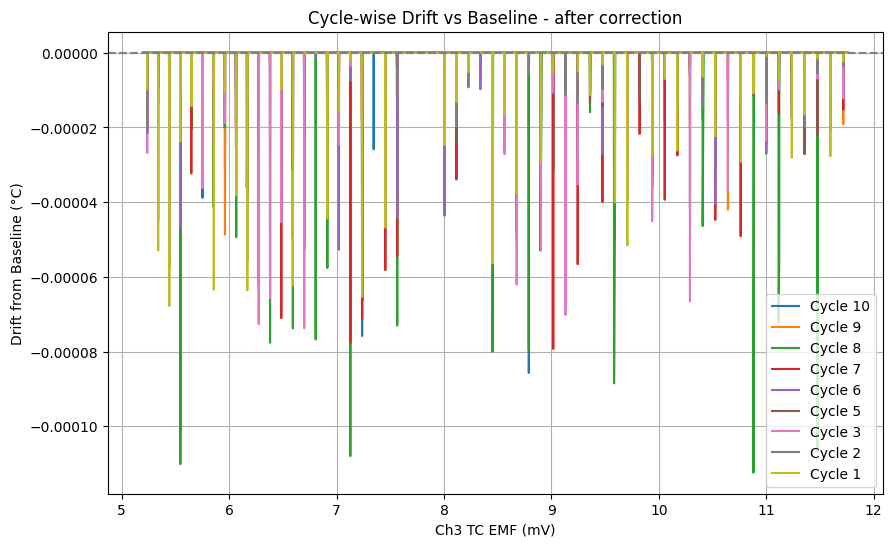

In [255]:
plt.figure(figsize=(10, 6))
plt.plot(drift_cycle10['Ch3 TC EMF (mV)'], drift_cycle10['Drift (Cycle 10) (°C)'], label='Cycle 10')
plt.plot(drift_cycle9['Ch3 TC EMF (mV)'], drift_cycle9['Drift (Cycle 9) (°C)'], label='Cycle 9')
plt.plot(drift_cycle8['Ch3 TC EMF (mV)'], drift_cycle8['Drift (Cycle 8) (°C)'], label='Cycle 8')
plt.plot(drift_cycle7['Ch3 TC EMF (mV)'], drift_cycle7['Drift (Cycle 7) (°C)'], label='Cycle 7')
plt.plot(drift_cycle6['Ch3 TC EMF (mV)'], drift_cycle6['Drift (Cycle 6) (°C)'], label='Cycle 6')
plt.plot(drift_cycle5['Ch3 TC EMF (mV)'], drift_cycle5['Drift (Cycle 5) (°C)'], label='Cycle 5')
#plt.plot(drift_cycle4['Ch3 TC EMF (mV)'], drift_cycle4['Drift (Cycle 4) (°C)'], label='Cycle 4')
plt.plot(drift_cycle3['Ch3 TC EMF (mV)'], drift_cycle3['Drift (Cycle 3) (°C)'], label='Cycle 3')
plt.plot(drift_cycle2['Ch3 TC EMF (mV)'], drift_cycle2['Drift (Cycle 2) (°C)'], label='Cycle 2')
plt.plot(drift_cycle1['Ch3 TC EMF (mV)'], drift_cycle1['Drift (Cycle 1) (°C)'], label='Cycle 1')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Ch3 TC EMF (mV)")
plt.ylabel("Drift from Baseline (°C)")
plt.title("Cycle-wise Drift vs Baseline - after correction")
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend()
plt.show()

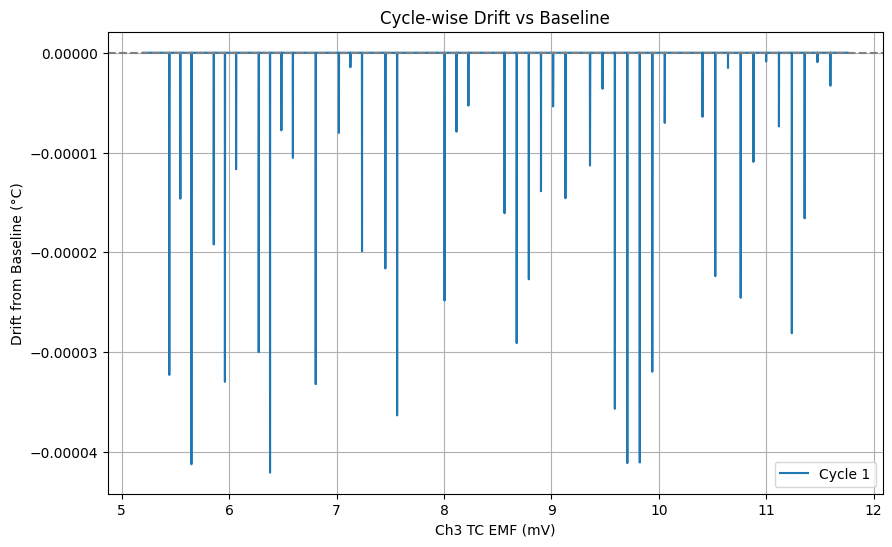

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(drift_cycle1['Ch3 TC EMF (mV)'], drift_cycle1['Drift (Cycle 1) (°C)'], label='Cycle 1')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Ch3 TC EMF (mV)")
plt.ylabel("Drift from Baseline (°C)")
plt.title("Cycle-wise Drift vs Baseline")   
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend()
plt.show()

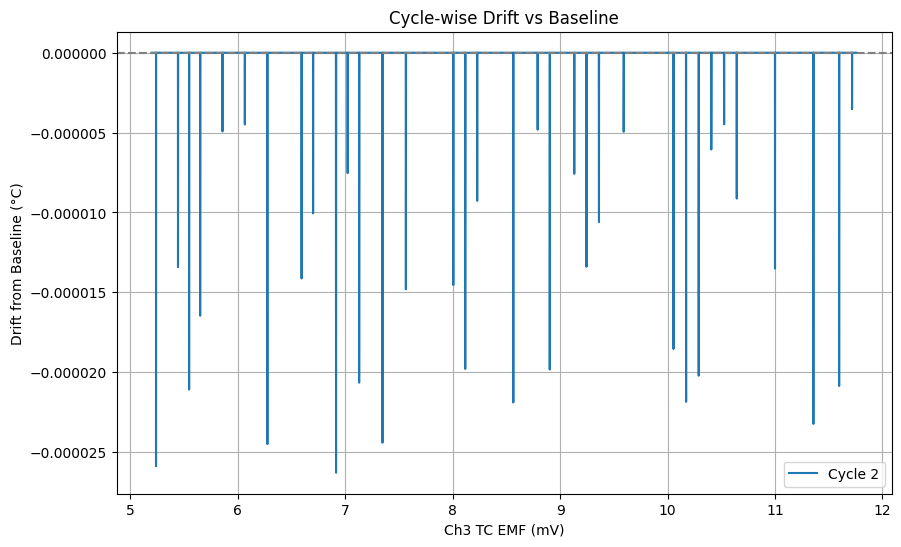

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(drift_cycle2['Ch3 TC EMF (mV)'], drift_cycle2['Drift (Cycle 2) (°C)'], label='Cycle 2')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Ch3 TC EMF (mV)")
plt.ylabel("Drift from Baseline (°C)")
plt.title("Cycle-wise Drift vs Baseline")   
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend()
plt.show()

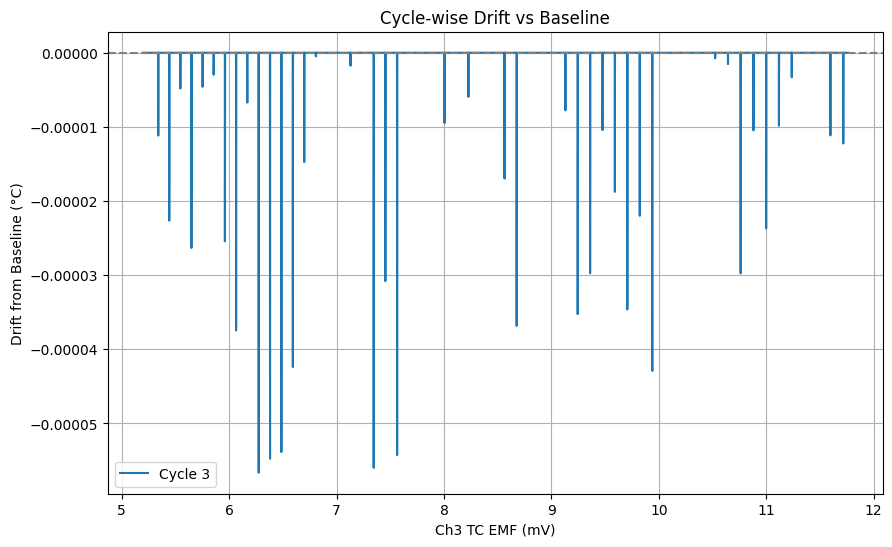

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(drift_cycle3['Ch3 TC EMF (mV)'], drift_cycle3['Drift (Cycle 3) (°C)'], label='Cycle 3')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Ch3 TC EMF (mV)")
plt.ylabel("Drift from Baseline (°C)")
plt.title("Cycle-wise Drift vs Baseline")   
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend()
plt.show()

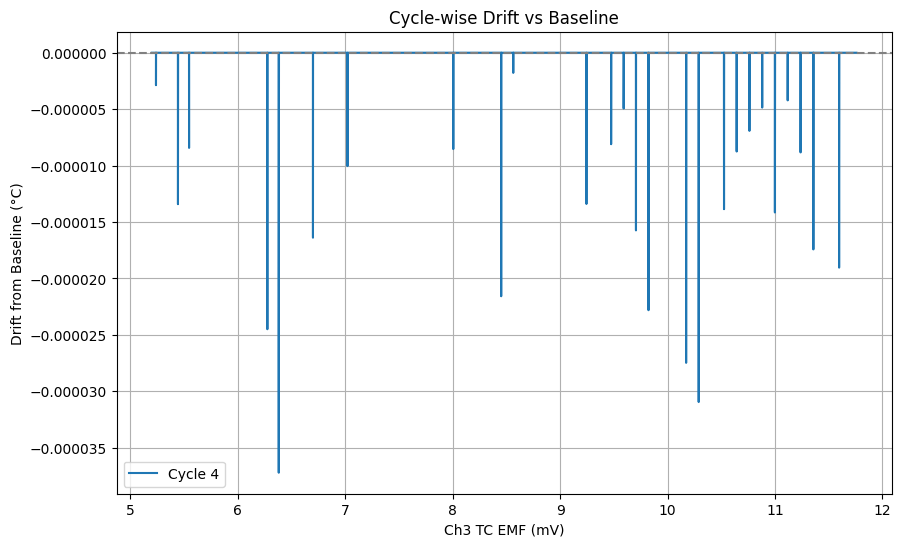

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(drift_cycle4['Ch3 TC EMF (mV)'], drift_cycle4['Drift (Cycle 4) (°C)'], label='Cycle 4')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Ch3 TC EMF (mV)")
plt.ylabel("Drift from Baseline (°C)")
plt.title("Cycle-wise Drift vs Baseline")   
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend()
plt.show()

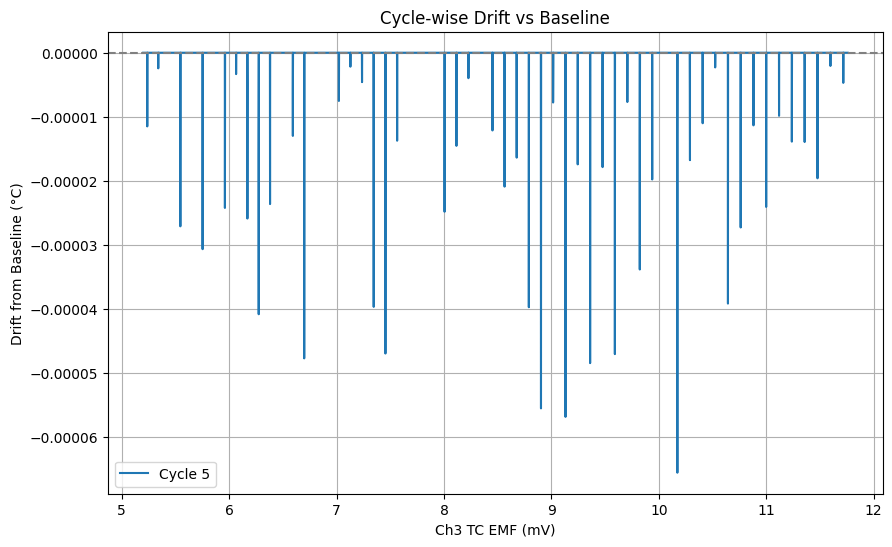

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(drift_cycle5['Ch3 TC EMF (mV)'], drift_cycle5['Drift (Cycle 5) (°C)'], label='Cycle 5')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Ch3 TC EMF (mV)")
plt.ylabel("Drift from Baseline (°C)")
plt.title("Cycle-wise Drift vs Baseline")   
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend()
plt.show()

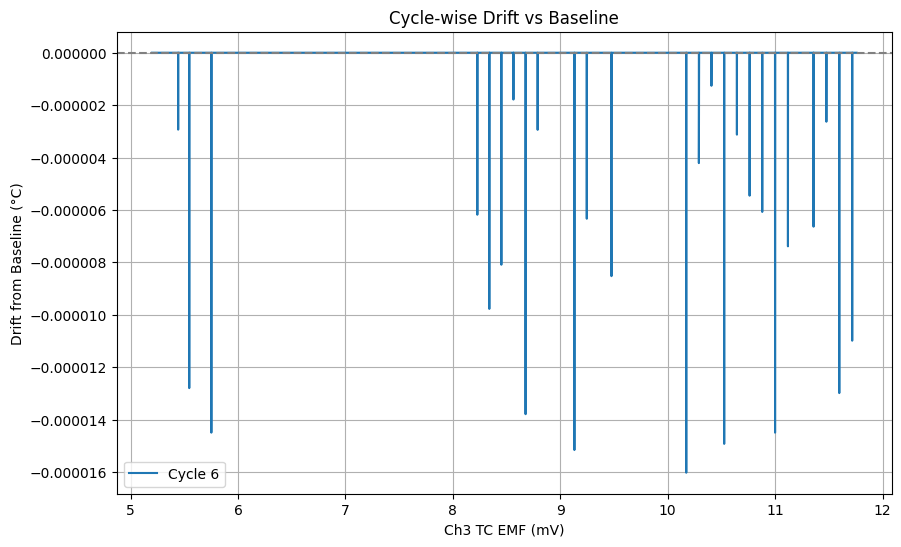

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(drift_cycle6['Ch3 TC EMF (mV)'], drift_cycle6['Drift (Cycle 6) (°C)'], label='Cycle 6')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Ch3 TC EMF (mV)")
plt.ylabel("Drift from Baseline (°C)")
plt.title("Cycle-wise Drift vs Baseline")   
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend()
plt.show()

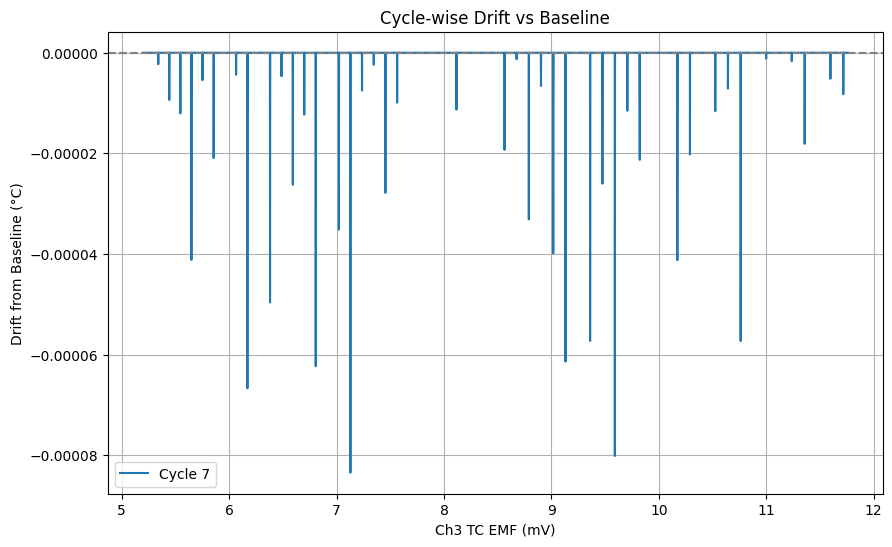

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(drift_cycle7['Ch3 TC EMF (mV)'], drift_cycle7['Drift (Cycle 7) (°C)'], label='Cycle 7')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Ch3 TC EMF (mV)")
plt.ylabel("Drift from Baseline (°C)")
plt.title("Cycle-wise Drift vs Baseline")   
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend()
plt.show()

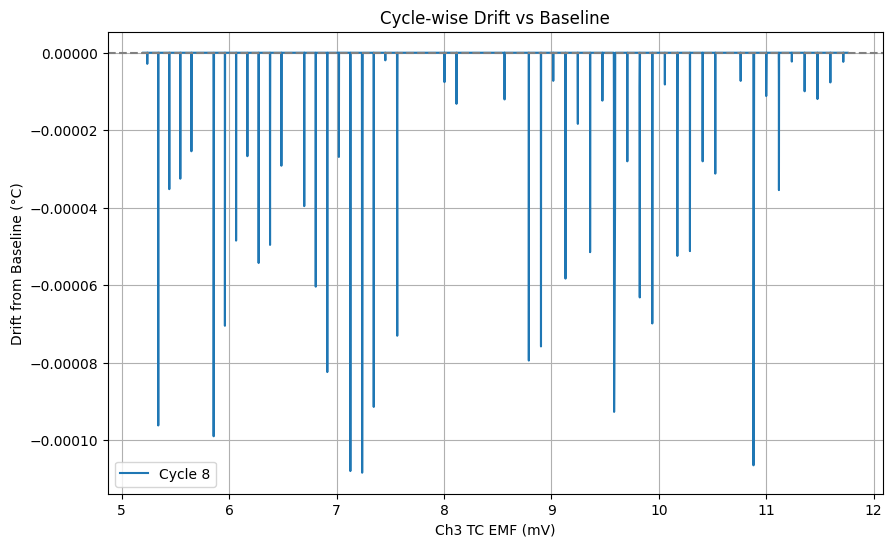

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(drift_cycle8['Ch3 TC EMF (mV)'], drift_cycle8['Drift (Cycle 8) (°C)'], label='Cycle 8')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Ch3 TC EMF (mV)")
plt.ylabel("Drift from Baseline (°C)")
plt.title("Cycle-wise Drift vs Baseline")   
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend()
plt.show()

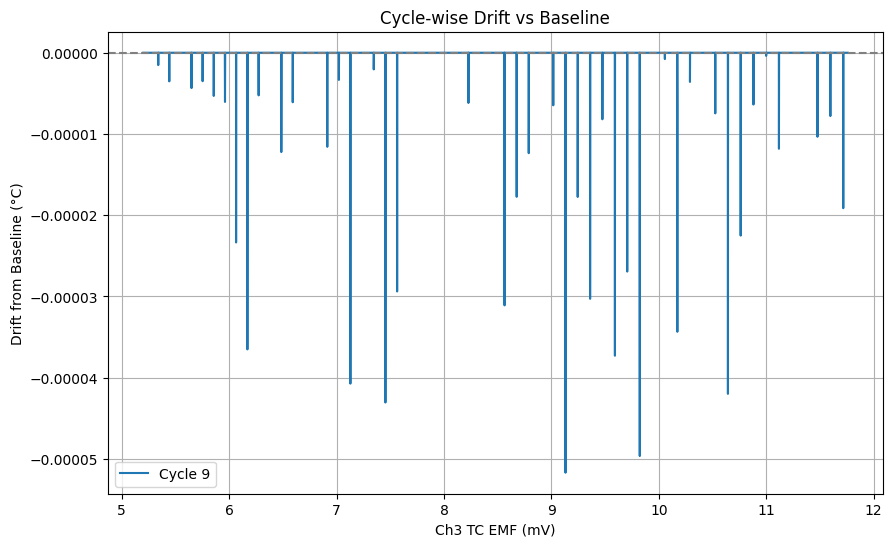

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(drift_cycle9['Ch3 TC EMF (mV)'], drift_cycle9['Drift (Cycle 9) (°C)'], label='Cycle 9')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Ch3 TC EMF (mV)")
plt.ylabel("Drift from Baseline (°C)")
plt.title("Cycle-wise Drift vs Baseline")   
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend()
plt.show()

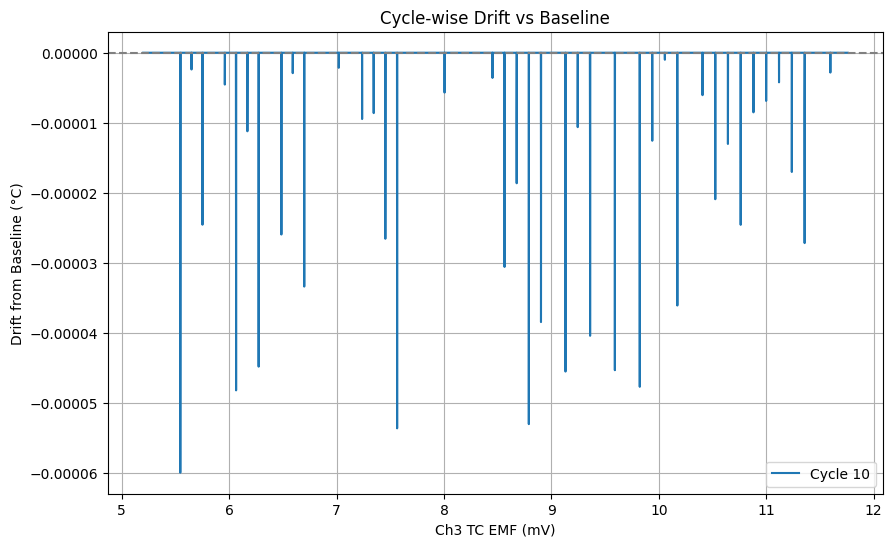

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(drift_cycle10['Ch3 TC EMF (mV)'], drift_cycle10['Drift (Cycle 10) (°C)'], label='Cycle 10')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Ch3 TC EMF (mV)")
plt.ylabel("Drift from Baseline (°C)")
plt.title("Cycle-wise Drift vs Baseline")   
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend()
plt.show()

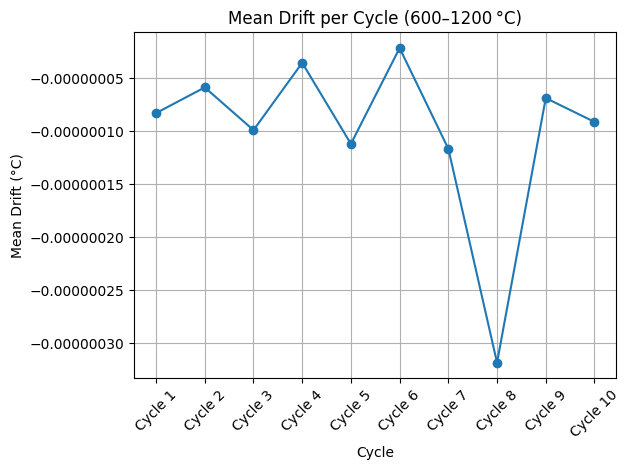

In [43]:
cycle_labels = [f"Cycle {i}" for i in range(1, 11)]
mean_drifts = []

# Loop over each cycle drift dataframe and compute the mean drift
for i in range(1, 11):
    df = globals()[f"drift_cycle{i}"]
    drift_col = f"Drift (Cycle {i}) (°C)"
    mean_drifts.append(df[drift_col].mean())

# Plotting the mean drift across cycles
plt.plot(cycle_labels, mean_drifts, marker='o', linestyle='-')
plt.title("Mean Drift per Cycle (600–1200 °C)")
plt.xlabel("Cycle")
plt.ylabel("Mean Drift (°C)")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()


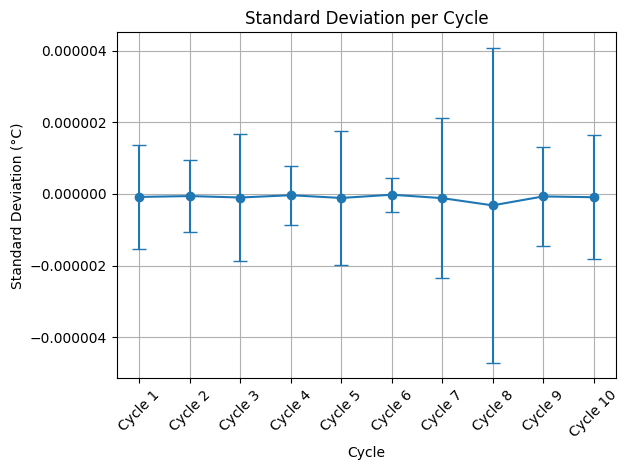

In [44]:
import numpy as np

std_devs = [globals()[f"drift_cycle{i}"][f"Drift (Cycle {i}) (°C)"].std() for i in range(1, 11)]

plt.errorbar(cycle_labels, mean_drifts, yerr=std_devs, fmt='o-', capsize=5)
plt.title("Standard Deviation per Cycle")
plt.xlabel("Cycle")
plt.ylabel("Standard Deviation (°C)")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()


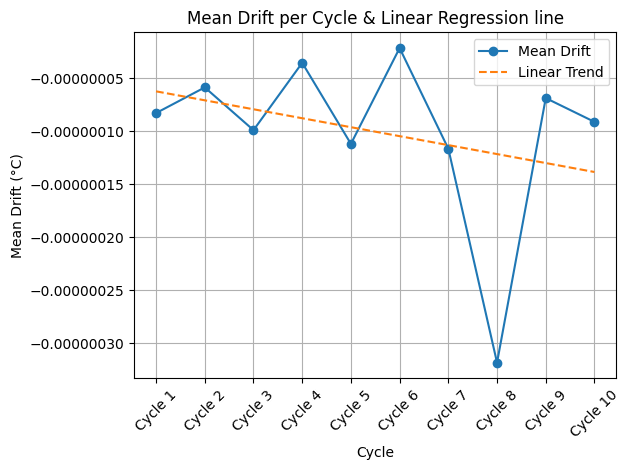

In [45]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.arange(1, 11).reshape(-1, 1)
y = np.array(mean_drifts).reshape(-1, 1)
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.plot(cycle_labels, mean_drifts, marker='o', label='Mean Drift')
plt.plot(cycle_labels, y_pred.flatten(), '--', label='Linear Trend')
plt.title("Mean Drift per Cycle & Linear Regression line")
plt.xlabel("Cycle")
plt.ylabel("Mean Drift (°C)")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.legend()
